In [9]:
#random 값 지정하기
import numpy as np
np.random.seed(5)

In [10]:
import pandas as pd
test = pd.read_csv('../Data/basketball_test.csv')
train = pd.read_csv('../Data/basketball_train.csv')

In [11]:
print(train.shape)
print(train.count())
print(train.isnull().sum())

(80, 5)
Player    80
Pos       80
3P        80
TRB       80
BLK       80
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


In [12]:
print(test.shape)
print(test.count())
print(test.isnull().sum())

(20, 5)
Player    20
Pos       20
3P        20
TRB       20
BLK       20
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


### 최적의 k 찾기 (교차검증 - cross validation)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차검증

In [14]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 점위를 3부터 학습 데이터의 절반까지 지정한다
max_k_range = train.shape[0] // 2 # 나눗셈 몫 (정수형으로 사용한다)
max_k_range 

40

In [15]:
# 최적의 k를 찾기 위한 범위 확인
k_list = []
for i in range(3, max_k_range , 2):
    k_list.append(i)
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [16]:
# 점수 및 Train Data 정의
cross_validation_scores = []
x_train = train[['3P','BLK','TRB']]
y_train = train['Pos']

print(x_train.head())
print(y_train.head())

    3P  BLK   TRB
0  0.0  1.0   3.2
1  1.6  0.2   2.8
2  0.0  2.1  14.1
3  0.9  1.1   7.8
4  1.4  0.1   1.3
0     C
1    SG
2     C
3     C
4    SG
Name: Pos, dtype: object


---


In [17]:
# 교차검증 (10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
# 전체 데이터가 80개니 8개씩 나눠진다.
for k in k_list:
    # print(k) # k 값 확인
    knn = KNeighborsClassifier( n_neighbors= k ) # 내 이웃 갯수 k_list로 지정
    scores = cross_val_score(
        knn, # 모델이름 ex svm knn rf 등
        x_train,
        y_train,
        cv = 10, # cv : cross-validation(교차검증 횟수) 10번 
        scoring= 'accuracy', # 점수는 뭐로 낼건지 , accuracy : 정확도
    )

    cross_validation_scores.append(scores.mean())
    
cross_validation_scores


[0.9125,
 0.925,
 0.9125,
 0.9125,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8125,
 0.8125]

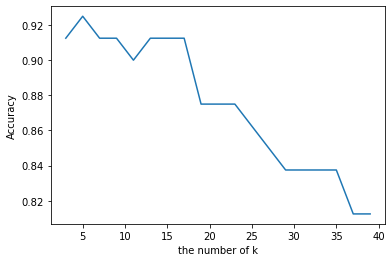

In [18]:
# k에 따른 정확도를 시각화
import matplotlib.pyplot as plt

plt.plot(k_list , cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [19]:
# 가장 예측율이 높은 k를 선정
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k is" , k)

The best number of k is 5


---
### 2개의 특징으로 예측하기 (3점슛 , 블로킹)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors= k)

In [22]:
# 학습에 사용할 features
x_train = train[['3P','BLK']]

In [23]:
# 학습에 사용할 target
y_train = train['Pos']

In [24]:
# 학습시키기
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [25]:
# 검증에 사용할 features
x_test = test[['3P','BLK']]

In [26]:
# 검증에 사용할 정답
y_test = test['Pos']

In [27]:
knn.score(x_test , y_test)

0.95

In [28]:
# 예측
pred = knn.predict(x_test)
pred

array(['SG', 'C', 'C', 'C', 'C', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'SG',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG'], dtype=object)

In [29]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
    {'예측값' : pred,
    '정답':y_test}
)
comparison.head()

,예측값,정답
0,SG,SG
1,C,C
2,C,C
3,C,C
4,C,C


### Confusion Matrix

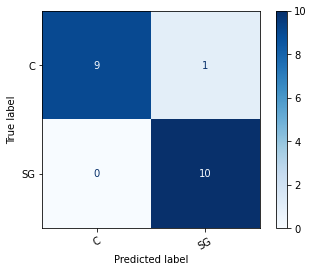

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix1 = confusion_matrix(y_test , pred)
# confusion_matrix1

target_names = ["C","SG"]

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels= target_names,
)

disp.plot(
    cmap=plt.cm.Blues,
    xticks_rotation=30,
)
plt.show()

---
### 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [31]:
# 학습에 사용할 features
x_train = train[['3P','BLK','TRB']]

In [32]:
# 학습
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
# 검증에 사용할 features
x_test = test[['3P','BLK','TRB']]

In [34]:
knn.score(x_test , y_test)

0.85

In [35]:
# 예측
pred = knn.predict(x_test)
pred

array(['SG', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'SG',
       'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'SG'], dtype=object)

In [36]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
    {'예측값' : pred,
    '정답':y_test}
)
comparison.head()

,예측값,정답
0,SG,SG
1,C,C
2,SG,C
3,C,C
4,C,C


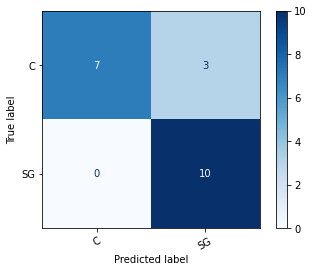

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix1 = confusion_matrix(y_test , pred)
# confusion_matrix1

target_names = ["C","SG"]

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels= target_names,
)

disp.plot(
    cmap=plt.cm.Blues,
    xticks_rotation=30,
)
plt.show()

<문제>  
3P : 3.4    
BLK : 0.5   
TRB : 3.7   

In [38]:
knn.predict([[3.4, 0.5, 3.7]])

array(['SG'], dtype=object)

---
